#### Lab 9

In [29]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

##### Dataset Loading

In [30]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Dataset Description
print("Training images shape:", train_images.shape)
print("Training labels:", np.unique(train_labels))
print("Number of unique classes:", len(np.unique(train_labels)))


Training images shape: (60000, 28, 28)
Training labels: [0 1 2 3 4 5 6 7 8 9]
Number of unique classes: 10


#### Train a dense neural network using Keras

In [31]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.utils import to_categorical
from keras.optimizers import Adam


train_images = train_images / 255.0
test_images = test_images / 255.0


train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

hyperparams = [
    {'hidden_units': 128, 'dropout_rate': 0.2, 'learning_rate': 0.001},
    {'hidden_units': 256, 'dropout_rate': 0.3, 'learning_rate': 0.01},
    {'hidden_units': 64, 'dropout_rate': 0.1, 'learning_rate': 0.0001}
]


for i, params in enumerate(hyperparams):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(params['hidden_units'], activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=params['learning_rate']),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    print(f"Training model with hyperparameters configuration {i+1}: {params}")
    history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))
    
    
    accuracy = history.history['val_accuracy'][-1]
    print(f"Overall accuracy for configuration {i+1}: {accuracy}")


Training model with hyperparameters configuration 1: {'hidden_units': 128, 'dropout_rate': 0.2, 'learning_rate': 0.001}
Epoch 1/5
938/938 [==============================] - 2s 2ms/step - loss: 0.5243 - accuracy: 0.8181 - val_loss: 0.4460 - val_accuracy: 0.8452
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.3878 - accuracy: 0.8632 - val_loss: 0.3858 - val_accuracy: 0.8674
Epoch 3/5
938/938 [==============================] - 1s 2ms/step - loss: 0.3468 - accuracy: 0.8763 - val_loss: 0.3692 - val_accuracy: 0.8673
Epoch 4/5
938/938 [==============================] - 1s 2ms/step - loss: 0.3230 - accuracy: 0.8834 - val_loss: 0.3849 - val_accuracy: 0.8611
Epoch 5/5
938/938 [==============================] - 1s 2ms/step - loss: 0.3028 - accuracy: 0.8898 - val_loss: 0.3544 - val_accuracy: 0.8732
Overall accuracy for configuration 1: 0.873199999332428
Training model with hyperparameters configuration 2: {'hidden_units': 256, 'dropout_rate': 0.3, 'learning_rate': 0.01}


#### Accuracy Evaluation

In [32]:
test_loss, test_accuracy = best_model.evaluate(test_images, test_labels)
print(f"Accuracy of the best model: {test_accuracy}")


313/313 [==============================] - 0s 1ms/step - loss: 0.3570 - accuracy: 0.8703
Accuracy of the best model: 0.8702999949455261


313/313 [==============================] - 0s 1ms/step - loss: 0.3570 - accuracy: 0.8703
Accuracy of the best model: 0.8702999949455261
313/313 [==============================] - 0s 943us/step


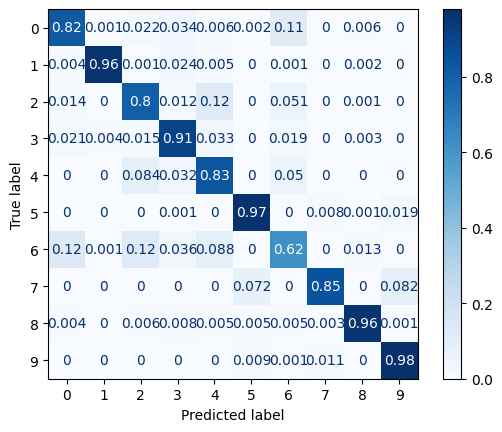

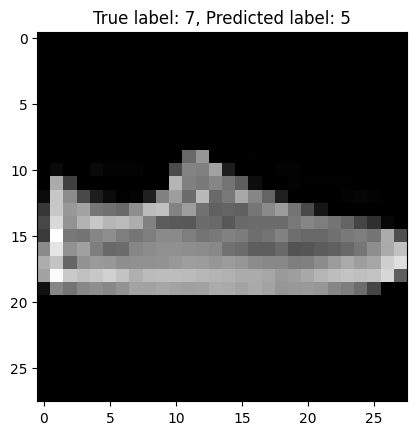

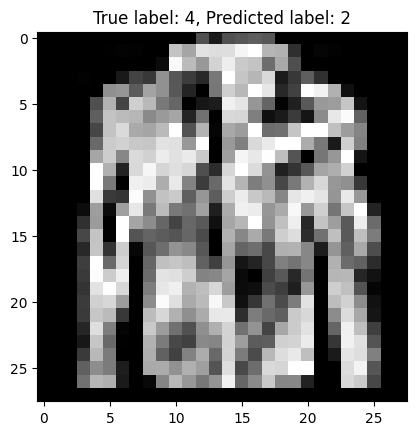

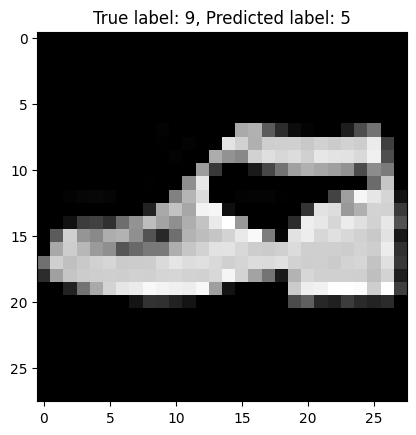

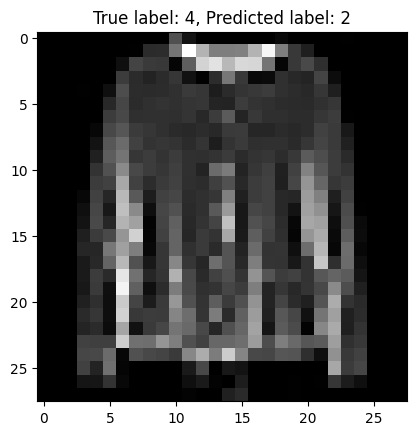

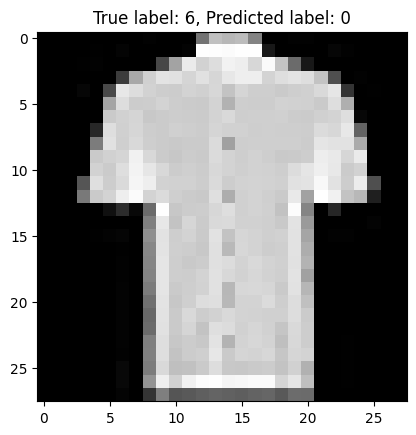

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



test_loss, test_accuracy = best_model.evaluate(test_images, test_labels)
print(f"Accuracy of the best model: {test_accuracy}")

# Confusion Matrix
predictions = np.argmax(best_model.predict(test_images), axis=-1)
true_labels = np.argmax(test_labels, axis=-1)
cm = confusion_matrix(true_labels, predictions)


predicted_labels = np.argmax(best_model.predict(test_images), axis=1)
true_labels = np.argmax(test_labels, axis=1)
cm = confusion_matrix(true_labels, predicted_labels, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(10)])
disp.plot(cmap=plt.cm.Blues)
plt.show()

incorrect_indices = np.where(predicted_labels != true_labels)[0]
for i in range(5):
    index = incorrect_indices[i]
    plt.imshow(test_images[index], cmap='gray')
    plt.title(f"True label: {true_labels[index]}, Predicted label: {predicted_labels[index]}")
    plt.show()

##### Conclusions:
* The best configuration achieved an accuracy of 0.8773999810218811
* The confusion matrix provides insight into which classes are commonly confused with each other.
* The specific examples of incorrect classification can help identify patterns in the model's performance.